<a href="https://colab.research.google.com/github/MRazin172/DL_Lab1/blob/main/DLLab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np

In [8]:


class perceptron:
    def __init__(self, inp):
        self.weights = np.random.rand(inp)
        self.bias = np.random.rand()

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self.activation_function(weighted_sum)

    def train(self, training_data, epochs=1000):
        for _ in range(epochs):
            errors = 0
            for input_data, target_output in training_data:
                prediction = self.predict(input_data)
                error = target_output - prediction
                if error != 0:
                    errors += 1
                    self.weights += error * np.array(input_data)
                    self.bias += error
            if errors == 0:
                break

def boolean_and(inputs):
    if inputs[0] == 1 and inputs[1] == 1:
        return 1
    else:
        return 0

def boolean_or(inputs):
    if inputs[0] == 1 or inputs[1] == 1:
        return 1
    else:
        return 0

def boolean_nand(inputs):
    if inputs[0] == 1 and inputs[1] == 1:
        return 0
    else:
        return 1

def boolean_xor(inputs):
    if inputs[0] != inputs[1]:
        return 1
    else:
        return 0

and_data = [
    ([0, 0], 0),
    ([0, 1], 0),
    ([1, 0], 0),
    ([1, 1], 1)
]

or_data = [
    ([0, 0], 0),
    ([0, 1], 1),
    ([1, 0], 1),
    ([1, 1], 1)
]

nand_data = [
    ([0, 0], 1),
    ([0, 1], 1),
    ([1, 0], 1),
    ([1, 1], 0)
]

xor_data = [
    ([0, 0], 0),
    ([0, 1], 1),
    ([1, 0], 1),
    ([1, 1], 0)
]

In [9]:
andd = perceptron(inp=2)
orr = perceptron(inp=2)
nand = perceptron(inp=2)
xor = perceptron(inp=2)

print("manual weights:")
print("and wieghts:",andd.weights)
print("or wieghts:", orr.weights)
print("nand weights:",nand.weights)
print("xor weihts:", xor.weights)

manual weights:
and wieghts: [0.05299121 0.55025732]
or wieghts: [0.68543829 0.91118669]
nand weights: [0.0575871  0.73589702]
xor weihts: [0.20304701 0.33668097]


In [10]:
andd.train(and_data)
orr.train(or_data)
nand.train(nand_data)
xor.train(xor_data)

print("weights after training are")
print("and :", andd.weights)
print("or:", orr.weights)
print("nand: ",nand.weights)
print("xor: ", xor.weights)

weights after training are
and : [2.05299121 0.55025732]
or: [1.68543829 0.91118669]
nand:  [-1.9424129  -1.26410298]
xor:  [-0.79695299  0.33668097]


Initially, wen the perceptrons are created, ther weights are set randmly.

However, as the perceptrons are trained with examples of inputs and ther corect outputs, the weights graduly change to valus that help the perceptrons make beter predictions. These weights indicate how much importnce each input shuld have in determing the final output.

In [11]:
def function(x):
    return x**4 - 3*x**3 + 2

def derivative(x):
    return 4*x**3 - 9*x**2

def gradient_descent(learning_rate, initial_x, precision):
    x = initial_x
    iterations = 0
    while True:
        gradient = derivative(x)
        new_x = x - learning_rate * gradient
        if abs(new_x - x) < precision:
            break
        x = new_x
        iterations += 1
    return x, iterations

learning_rate = 0.01
initial_x = 0
precision = 0.0001

minimum, iterations = gradient_descent(learning_rate, initial_x, precision)
print(f"Global minimum found at x = {minimum}")
print(f"Number of iterations: {iterations}")


Global minimum found at x = 0
Number of iterations: 0


This code's finds the lowst point on a math curve. ( f(x) = x^4 - 3x^3 + 2). The  Gradient Desent follows the curve's slop Along the way, it traks the steps taken.

After its search, the code shares its findins: the spot it thinks is the minimum and how many steps it took.

In [12]:
import matplotlib.pyplot as plt

Solving f(x) = x^2 - 2x + 2
Global minimum at x = 0.999999518302382
Iterations taken: 719


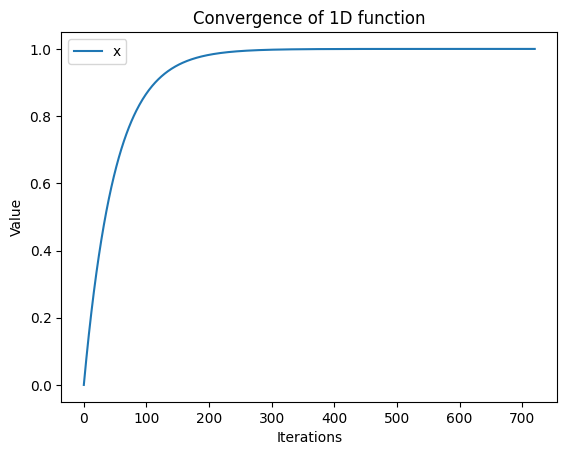


Solving f(x, y) = (1 - x)^2 + 100(y - x^2)^2
Global minimum at (x, y) = 0.994486404269462 0.9779054957018583
Iterations taken: 10000


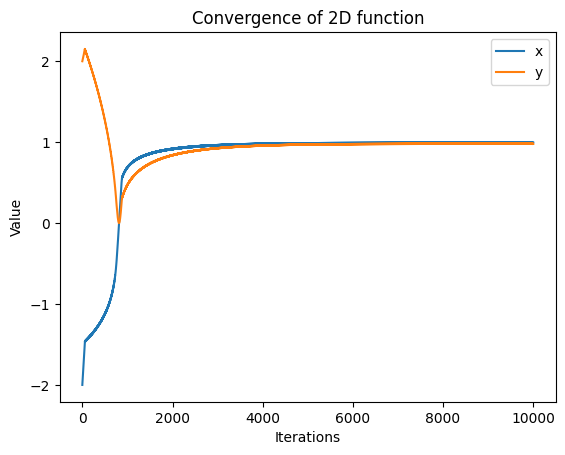

In [13]:


def gradient_descent_1d(learning_rate, initial_x, max_iterations, tolerance):
    x_val = initial_x
    iterations = 0
    x_history = [x_val]

    while iterations < max_iterations:
        gradient = 2 * x_val - 2
        x_val -= learning_rate * gradient

        x_history.append(x_val)

        if abs(gradient) < tolerance:
            break

        iterations += 1

    return x_val, iterations, x_history

def gradient_descent_2d(learning_rate, initial_x, initial_y, max_iterations, tolerance):
    x_val = initial_x
    y_val = initial_y
    iterations = 0
    x_history = [x_val]
    y_history = [y_val]

    while iterations < max_iterations:
        gradient_x = 2 * (x_val - 1) - 400 * x_val * (y_val - x_val**2)
        gradient_y = 200 * (y_val - x_val**2)

        gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
        if gradient_magnitude != 0:
            gradient_x /= gradient_magnitude
            gradient_y /= gradient_magnitude

        x_val -= learning_rate * gradient_x
        y_val -= learning_rate * gradient_y

        x_history.append(x_val)
        y_history.append(y_val)

        gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

        if gradient_magnitude < tolerance:
            break

        iterations += 1

    return x_val, y_val, iterations, x_history, y_history

def plot_convergence(x_values, y_values, equation_type):
    plt.plot(range(len(x_values)), x_values, label='x')
    if y_values:
        plt.plot(range(len(y_values)), y_values, label='y')
    plt.xlabel('Iterations')
    plt.ylabel('Value')
    plt.title(f'Convergence of {equation_type} function')
    plt.legend()
    plt.show()

def main():
    learning_rate = 0.01
    max_iterations = 10000
    tolerance = 1e-6

    print("Solving f(x) = x^2 - 2x + 2")
    min_x, iterations_1d, x_history_1d = gradient_descent_1d(learning_rate, 0, max_iterations, tolerance)
    print("Global minimum at x =", min_x)
    print("Iterations taken:", iterations_1d)
    plot_convergence(x_history_1d, None, "1D")

    print("\nSolving f(x, y) = (1 - x)^2 + 100(y - x^2)^2")
    min_x, min_y, iterations_2d, x_history_2d, y_history_2d = gradient_descent_2d(learning_rate, -2, 2, max_iterations, tolerance)
    print("Global minimum at (x, y) =", min_x, min_y)
    print("Iterations taken:", iterations_2d)
    plot_convergence(x_history_2d, y_history_2d, "2D")

if __name__ == "__main__":
    main()


In our code, we are using gradient descent to find the minimum points of two different mathematical functions.

They take inputs such as the learning rate, initial values, maximum iterations, and tolerance.
tolenrance is used to indicate convergence

the main function sets the parameters for gradient descent and calls the gradient descent functions for both the 1D and 2D functions.